In [7]:
!pip install contextily osmnx

In [8]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
import osmnx as ox

In [9]:
city = ox.geocode_to_gdf("Mumbai, India")

In [10]:
schools = ox.features_from_place("Mumbai, India", {"amenity": "school"})
roads = ox.features_from_place("Mumbai, India", {"highway": ["primary", "secondary", "tertiary"]})
water = ox.features_from_place("Mumbai, India", {"natural": "water"})
if not water.empty:
    water = water[water.geometry.type.isin(["Polygon", "MultiPolygon"])]

In [11]:
schools_m = schools.to_crs(epsg=3857)
roads_m = roads.to_crs(epsg=3857)
water_m = water.to_crs(epsg=3857) if not water.empty else None
city_m = city.to_crs(epsg=3857)

In [12]:
school_buffer = schools_m.buffer(1000)
road_buffer = roads_m.buffer(500)
school_buffer_gdf = gpd.GeoDataFrame(geometry=school_buffer, crs=schools_m.crs)
road_buffer_gdf = gpd.GeoDataFrame(geometry=road_buffer, crs=roads_m.crs)
road_buffer_clipped = gpd.overlay(road_buffer_gdf, city_m, how="intersection")
candidate_sites = gpd.overlay(road_buffer_clipped, school_buffer_gdf, how="difference")
if water_m is not None and not water_m.empty:
    candidate_sites = gpd.overlay(candidate_sites, water_m, how="difference")

/tmp/ipython-input-1590015811.py:10: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend()


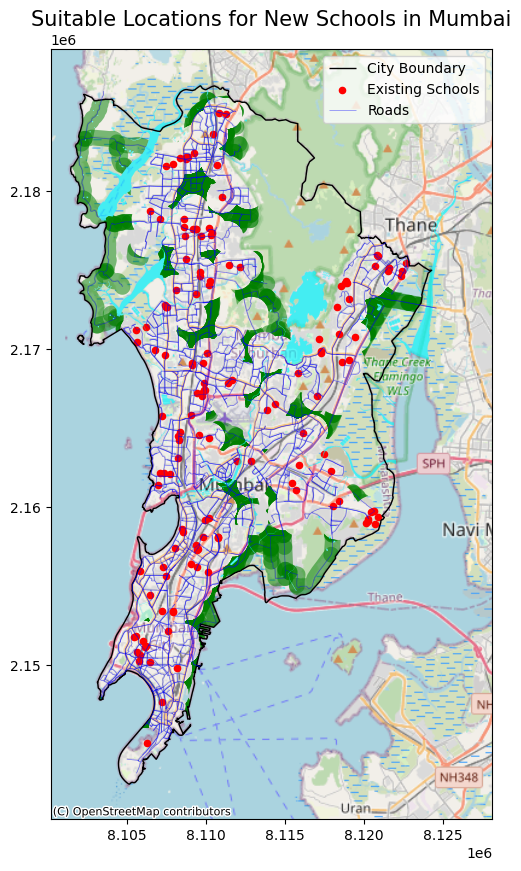

In [13]:
fig, ax = plt.subplots(figsize=(10, 10))
city_m.boundary.plot(ax=ax, color="black", linewidth=1, label="City Boundary")
candidate_sites.plot(ax=ax, color="green", alpha=0.5, label="Suitable Zones")
schools_points = schools_m[schools_m.geometry.type=="Point"]
schools_points.plot(ax=ax, color="red", markersize=20, label="Existing Schools", marker='o')
roads_m.plot(ax=ax, color="blue", linewidth=0.5, alpha=0.5, label="Roads")
if water_m is not None:
    water_m.plot(ax=ax, color="cyan", alpha=0.6, label="Water Bodies")
ctx.add_basemap(ax, crs=city_m.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)
ax.legend()
ax.set_title("Suitable Locations for New Schools in Mumbai", fontsize=15)
plt.show()

In [14]:
candidate_sites.to_file("suitable_school_locations.geojson", driver="GeoJSON")

#CONCLUSION

In conclusion, this project successfully demonstrated the application of geospatial analysis as an effective and efficient method for preliminary site selection in urban planning. By systematically applying criteria for accessibility and service area needs—specifically, proximity to major roads and distance from existing schools—this study has identified and mapped numerous potential zones for new school development across Mumbai. The resulting GeoJSON dataset provides a tangible, data-driven foundation for planners, narrowing the field of search from the entire city to a curated set of high-potential areas. While this analysis serves as a critical first-pass screening, it is imperative to recognize that these findings must be further refined with detailed demographic, zoning, and economic data, and ultimately validated through on-site field investigation. This GIS-based approach provides a strategic advantage, enabling stakeholders to focus resources and make more informed decisions to address the evolving educational infrastructure needs of Mumbai's residents.